Get the transcript of Trent speaking Spanish

In [227]:
from youtube_transcript_api import YouTubeTranscriptApi

video_id = "Mild3dmTKsQ"
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['es'])

stage_start = 370  # seconds
florentino_on_stage = [s for s in transcript if s['start'] < stage_start]
trent_on_stage = [s for s in transcript if s['start'] >= stage_start]

florentino_speech = " ".join([s['text'] for s in florentino_on_stage])
trent_speech = " ".join([s['text'] for s in trent_on_stage])

trent_speech = trent_speech.replace('[Aplausos]', '').strip()
florentino_speech = florentino_speech.replace('[Aplausos]', '').strip()
print("Florentino's speech:")
print(florentino_speech)
print("\nTrent's speech:")
print(trent_speech)

Florentino's speech:
endas del Real Madrid, patronos de la Fundación Real Madrid, socios y peñistas, buenas tardes y bienvenidos a la ciudad Real Madrid. Hoy volvemos a vivir un día muy importante para todos los madridistas, porque llega al Real Madrid un jugador que lo ha ganado todo, que es uno de los mejores defensas laterales del mundo y que ha marcado una época en uno de los clubes de fútbol más importantes y y prestigiosos como es el Liverpool. Allí se ha convertido a sus 26 años en toda una leyenda y ahora seguir quiere seguir construyendo su gran historia de amor con el fútbol, formando parte de nuestra gran familia. Hoy recibimos a un jugador excepcional que quiere sentir la emoción de vestir nuestra camiseta y damos la bien la bienvenida a Tren Alexander Arno. Querido tren, bienvenido al Real Madrid y lo primero que quiero transmitirte es nuestro agradecimiento porque sabemos lo que significa para ti poder jugar en el Real Madrid. Podrías haber continuado tu carrera en cualqu

Now get the transcript of Bellingham speaking Spanish

In [228]:
video_id = "vKRxH-d4XQI"

transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['es'])

# Helper function to find segment indices by start/end phrases
def find_segment_indices(transcript, start_phrase, end_phrase):
    start_idx = end_idx = None
    for i, seg in enumerate(transcript):
        if start_idx is None and start_phrase.lower() in seg['text'].lower():
            start_idx = i
        if start_idx is not None and end_phrase.lower() in seg['text'].lower():
            end_idx = i
            break
    return start_idx, end_idx

# 1st segment
start1, end1 = find_segment_indices(transcript, "Sí, sí. un partido", "feliz al canal")
bellingham_1 = transcript[start1:end1+1]

# 2nd segment
start2, end2 = find_segment_indices(transcript, "Sí, muy muy buen jugada", "fácil")
bellingham_2 = transcript[start2:end2+1]

# 3rd segment
start3, end3 = find_segment_indices(transcript, "Increíble", "ojalá para más")
bellingham_3 = transcript[start3:end3+1]

# 4th segment
start4, end4 = find_segment_indices(transcript, "Eh, ojalá ganamos", "nervioso")
bellingham_4 = transcript[start4:end4+1]

# Join text for each segment
bellingham_speech_1 = " ".join([s['text'] for s in bellingham_1])
bellingham_speech_2 = " ".join([s['text'] for s in bellingham_2])
bellingham_speech_3 = " ".join([s['text'] for s in bellingham_3])
bellingham_speech_4 = " ".join([s['text'] for s in bellingham_4])

bellingham_speech = " ".join([
    bellingham_speech_1,
    bellingham_speech_2,
    bellingham_speech_3,
    bellingham_speech_4
])


In [229]:
with open("transcripts.txt", "w", encoding="utf-8") as f:
    f.write("Florentino's speech:\n")
    f.write(florentino_speech + "\n\n")
    f.write("Trent's speech:\n")
    f.write(trent_speech + "\n\n")
    f.write("Bellingham's speech:\n")
    f.write(bellingham_speech + "\n")

In [230]:
import textstat
import pandas as pd
import spacy
from collections import Counter

# Load Spanish language model
nlp = spacy.load("es_core_news_md")

def analyze_spanish_text(text):
    doc = nlp(text)
    
    # Basic stats
    num_words = len([token for token in doc if not token.is_punct])
    num_sentences = len(list(doc.sents))
    avg_sentence_length = num_words / num_sentences
    
    # Vocabulary diversity (type-token ratio)
    unique_words = set(token.text.lower() for token in doc if not token.is_punct and token.is_alpha)
    ttr = len(unique_words) / num_words
    
    # Word frequency analysis (using lemma)
    word_freq = Counter(token.lemma_.lower() for token in doc if not token.is_punct and token.is_alpha)
    common_words = [word for word, count in word_freq.most_common(10)]
    
    # Verb analysis
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    verb_counts = Counter(verbs)
    
    # Subjunctive mood detection (simplified)
    subjunctive = [token.text for token in doc if "Sub" in token.morph.get("Mood", [])]
    
    # Readability scores
    fernandez_huerta = textstat.fernandez_huerta(text)
    gutierrez_polini = textstat.gutierrez_polini(text)
    szigriszt_pazos = textstat.szigriszt_pazos(text)
    crawford = textstat.crawford(text)
    
    return {
        "word_count": num_words,
        "sentence_count": num_sentences,
        "avg_sentence_length": avg_sentence_length,
        "type_token_ratio": ttr,
        "most_common_words": common_words,
        "unique_word_count": len(unique_words),
        "verb_diversity": len(verb_counts),
        "subjunctive_count": len(subjunctive),
        "fernandez_huerta": fernandez_huerta,
        "gutierrez_polini": gutierrez_polini,
        "szigriszt_pazos": szigriszt_pazos,
        "crawford": crawford
    }

trent_analysis = analyze_spanish_text(trent_speech)
florentino_analysis = analyze_spanish_text(florentino_speech)
bellingham_analysis = analyze_spanish_text(bellingham_speech)

scores_df = pd.DataFrame({
    "Trent": trent_analysis,
    "Florentino": florentino_analysis,
    "Bellingham": bellingham_analysis
})

display(scores_df)

,Trent,Florentino,Bellingham
word_count,107,902,162
sentence_count,7,40,20
avg_sentence_length,15.285714,22.55,8.1
type_token_ratio,0.64486,0.363636,0.549383
most_common_words,"[y, el, madrid, por, ser, mucho, de, a, todo, ...","[el, de, que, y, uno, ser, en, del, él, real]","[mucho, ser, el, para, en, y, eh, sí, partido,..."
unique_word_count,69,328,89
verb_diversity,9,50,7
subjunctive_count,0,3,0
fernandez_huerta,94.799973,88.31423,100.963069
gutierrez_polini,45.610748,43.318764,48.398148


functionality for radar plotting

In [237]:
variables = [
    'crawford',
    'subjunctive_per_100',
    'avg_sentence_length',
    'verb_diversity_per_100',
    'type_token_ratio',
    'fernandez_huerta_inverted',
    'gutierrez_polini_inverted',
    'szigriszt_pazos_inverted' 
]

readable_labels = [
    "School grade level",
    "Subjunctives (per 100 words)",
    "Avg. sentence length",
    "Unique verbs (per 100 words)",
    "Lexical diversity (TTR)",
    "Reversed readability",
    "Reversed comprehensibility",
    "Reversed perspicuity" 
]

# Define ranges for each axis (invert those where lower = harder)
ranges = [
    (0, 4.0),             # crawford (schooling years)
    (0, 0.4),                # subjunctive per 100
    (0, 26),               # avg sentence length
    (0, 10),               # verb diversity per 100
    (0, 0.8),                # TTR
    (0, 40),              # fernandez_huerta (inverted already)
    (0, 70),              # polini (inverted already)
    (0, 20)               # szigriszt_pazos (inverted already)
]

plot_df = scores_df.copy()
# Convert single-value tuples to floats
# plot_df.loc['gutierrez_polini'] = plot_df.loc['gutierrez_polini'].apply(lambda x: x[0])

# Normalise features (per 100 words)
plot_df.loc['verb_diversity_per_100'] = plot_df.loc['verb_diversity'] / plot_df.loc['word_count'] * 100
plot_df.loc['subjunctive_per_100'] = plot_df.loc['subjunctive_count'] / plot_df.loc['word_count'] * 100

# Invert readability scores (higher = harder)
plot_df.loc['fernandez_huerta_inverted'] = 121.22 - plot_df.loc['fernandez_huerta']
plot_df.loc['gutierrez_polini_inverted'] = 100 - plot_df.loc['gutierrez_polini']
plot_df.loc['szigriszt_pazos_inverted'] = 100 - plot_df.loc['szigriszt_pazos']

plot_df = plot_df.loc[variables]

display(plot_df)
# Extract data tuples per speaker
trent_data = plot_df['Trent'].tolist()
florentino_data = plot_df['Florentino'].tolist()
bellingham_data = plot_df['Bellingham'].tolist()


,Trent,Florentino,Bellingham
crawford,3.128514,3.460814,2.504111
subjunctive_per_100,0.0,0.332594,0.0
avg_sentence_length,15.285714,22.55,8.1
verb_diversity_per_100,8.411215,5.543237,4.320988
type_token_ratio,0.64486,0.363636,0.549383
fernandez_huerta_inverted,26.420027,32.90577,20.256931
gutierrez_polini_inverted,54.389252,56.681236,51.601852
szigriszt_pazos_inverted,8.596509,14.868896,2.416675


In [238]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics

def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=3):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, labels=readable_labels)
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
            if angle == 0:
                txt.set_horizontalalignment('left')
            elif angle == 180:
                txt.set_horizontalalignment('right')
            else:
                txt.set_horizontalalignment('center')
            txt.set_verticalalignment('center')
            txt.set_position((-0.1,-0.1)) # move labels outward
            # txt.set_horizontalalignment('center')
            
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
            
            # ax.yaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            # gridlabel = ["{}".format(round(x,2)) 
            #              for x in grid]
            gridlabel = [f"{int(x)}" if x == int(x) else f"{x:.1f}" for x in grid]
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            ax.yaxis.grid(False)  # Hide circular grid
            ax.tick_params(axis='y', labelsize=8, colors='gray', pad=500)
            # ax.tick_params(pad=123)
            for label in ax.get_yticklabels():
                x, y = label.get_position()
                label.set_position((x, y + 5))  # Adjust y for outward shift
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)


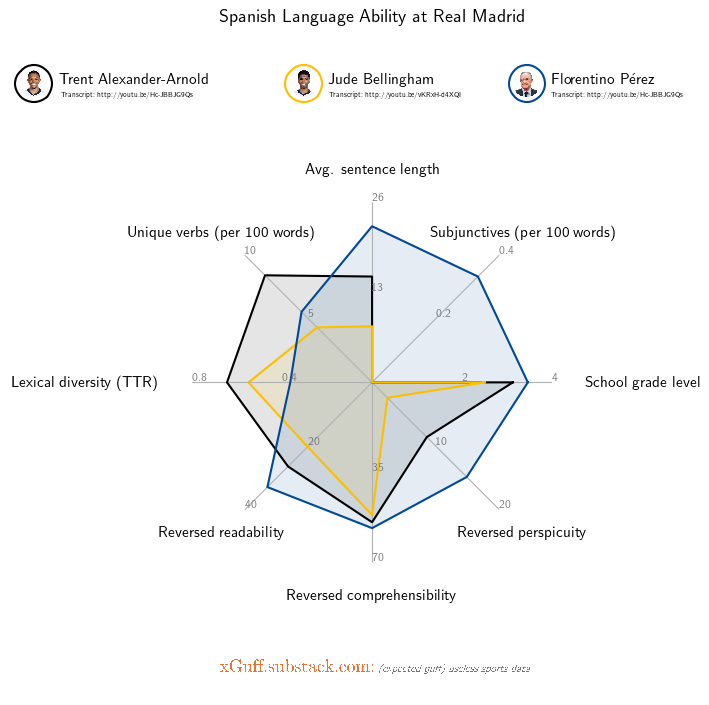

In [306]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle
from PIL import Image, ImageDraw
import textwrap

def crop_circle(image_path):
    """Returns a circularly cropped RGBA image as a NumPy array with transparency preserved"""
    im = Image.open(image_path).convert("RGBA")
    size = min(im.size)
    
    # Center crop to square
    left = (im.width - size) // 2
    top = (im.height - size) // 2
    im_cropped = im.crop((left, top, left + size, top + size))

    # Create circular mask
    mask = Image.new('L', (size, size), 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, size, size), fill=255)

    # Create a transparent background
    result = Image.new("RGBA", (size, size), (0, 0, 0, 0))
    result.paste(im_cropped, (0, 0), mask)

    return np.array(result)

fig = plt.figure(figsize=(4, 4))
radar = ComplexRadar(fig, variables, ranges)

# Plot data
radar.plot(trent_data, label='Trent Alexander-Arnold', color='black')
radar.fill(trent_data, alpha=0.1, color='black')
radar.plot(bellingham_data, label='Jude Bellingham', color='#FCBF00')
radar.fill(bellingham_data, alpha=0.1, color='#FCBF00')
radar.plot(florentino_data, label='Florentino Perez', color='#004996')
radar.fill(florentino_data, alpha=0.1, color='#004996')

from matplotlib.patches import Patch

custom_legend = [
    Patch(alpha=0, label='Trent Alexander-Arnold'),
    Patch(alpha=0, label='Jude Bellingham'),
    Patch(alpha=0, label='Florentino Pérez'),
]

# radar.ax.legend(
#     handles=custom_legend,
#     loc='upper center',
#     bbox_to_anchor=(0.5, 1.4),
#     ncol=3,
#     frameon=False
# )
radar.ax.legend(
    handles=custom_legend,
    loc='upper center',
    bbox_to_anchor=(0.4, 1.4),
    ncol=3,
    frameon=False,
    # handletextpad=2.0,  # spacing between patch and text
    columnspacing=5,  # horizontal spacing between columns
    # labelspacing=1.2    # vertical spacing between rows (not needed here but good to know)
)

# Load and crop the image
trent_img = crop_circle("../data/trent.png")
trent_offset = OffsetImage(trent_img, zoom=0.02)

jude_img = crop_circle("../data/jude.png")
jude_offset = OffsetImage(jude_img, zoom=0.02)

florentino_img = crop_circle("../data/florentino.png")
florentino_offset = OffsetImage(florentino_img, zoom=0.04)


# Place image with a bounding box
trent_ab = AnnotationBbox(
    trent_offset,
    (-0.44, 1.33),  # adjust position as needed
    xycoords='axes fraction',
    frameon=True,
    bboxprops=dict(edgecolor='black', linewidth=1.5, boxstyle='circle')
)
# Add custom subtitles as text below each label
radar.ax.text(-0.365, 1.31, "Transcript: http://youtu.be/Hc-JBBJG9Qs", ha='left', va='top', fontsize=5, transform=radar.ax.transAxes)

jude_ab = AnnotationBbox(
    jude_offset,
    (0.31, 1.33),  # adjust position as needed
    xycoords='axes fraction',
    frameon=True,
    bboxprops=dict(edgecolor='#FCBF00', linewidth=1.5, boxstyle='circle')
)
radar.ax.text(0.38, 1.31, "Transcript: http://youtu.be/vKRxH-d4XQI", ha='left', va='top', fontsize=5, transform=radar.ax.transAxes)

florentino_ab = AnnotationBbox(
    florentino_offset,
    (0.93, 1.33),  # adjust position as needed
    xycoords='axes fraction',
    frameon=True,
    bboxprops=dict(edgecolor='#004996', linewidth=1.5, boxstyle='circle')
)
radar.ax.text(0.997, 1.31, "Transcript: http://youtu.be/Hc-JBBJG9Qs", ha='left', va='top', fontsize=5, transform=radar.ax.transAxes)

fig.axes[0].add_artist(trent_ab)
fig.axes[0].add_artist(jude_ab)
fig.axes[0].add_artist(florentino_ab)

# Load and resize logo image
logo_img = plt.imread("../data/logo.png")  # or just plt.imread() if no cropping
logo_offset = OffsetImage(logo_img, zoom=0.02)  # adjust zoom as needed

# Create and place the image box
logo_ab = AnnotationBbox(
    logo_offset,
    (0.5, -0.3),  # Centered below plot; adjust y to control distance
    xycoords='axes fraction',
    frameon=False
)

fig.axes[0].add_artist(logo_ab)

plt.title("Spanish Language Ability at Real Madrid", pad=130)
plt.savefig("trent_spanish.png", dpi=700, bbox_inches='tight')
plt.show()